<a href="https://colab.research.google.com/github/hiraymanasi/Internship_GRIP/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 : To Explore
Supervised Machine Learning**

To predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#To import data set.
link = "http://bit.ly/w-data"
data = pd.read_csv(link)


Text(0, 0.5, 'Scores')

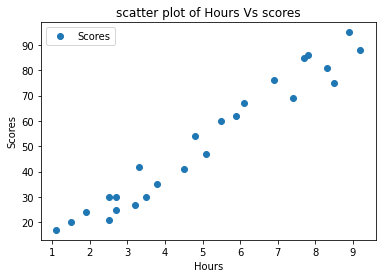

In [4]:
#Plotting the scatter plot:
data.plot(x='Hours',y='Scores',style='o')
plt.title('scatter plot of Hours Vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

From the above scatter plot we can see the positive linear relationship between the hours of study and the secured scores.

In [5]:
#Preparing the data:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Next, we split 80% of the data to the training set while 20% of the data to test set.

In [6]:
# Dividing the data into train and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# To train our algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2.018160041434662
[9.91065648]


This means that for every one unit of change in hours studied, the change in the scores  is about 9.91%.

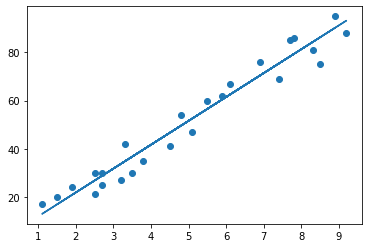

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,);
plt.show()

we trained our algorithm so now we can predict.

In [10]:
y_prd = regressor.predict(X_test)

we now compare these predicted scores to actual scores.

In [11]:
data_frame= pd.DataFrame({'Actual': y_test, 'Predicted': y_prd})
data_frame

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Our main aim is to predict the percentage of marks that a student is expected to score if he studied for 9.25 hours.

In [12]:
given_hours= 9.25
score_prd= regressor.predict([[given_hours]])
print("No of Hours = {}".format(given_hours))
print("Predicted Score = {}".format(score_prd[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [ ]:
#Evaluating Model:
from sklearn import metrics   

Model evaluation is very important to understand the performance of your model and to compare it with other models. There are 3 main metrics for model evaluation in regression : Mean absolute error, Mean squared error, and Root Mean squared error.

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prd))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prd))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prd)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
